In [1]:
import util

train_loader, val_loader, test_loader = util.make_loaders(batch_size = 1, mode = 'test', sample_mode='')

/localdisk0/SCRATCH/cgarchbold/envs/py40/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2174 1739.2 217.4 218


In [2]:
from tqdm import tqdm

train_values = []

for batch in tqdm(train_loader):
    image, masks, values = batch['image'], batch['masks'], batch['values']
    indices = values.nonzero(as_tuple=True)
    train_values.extend(values[indices])
    #print(train_values)


100%|██████████| 1739/1739 [02:00<00:00, 14.38it/s]


In [9]:
import numpy as np
import scipy
import torch

train_values = np.array(train_values)

mu,std = scipy.stats.norm.fit(train_values)

gauss = torch.distributions.Normal(mu,std)

In [6]:
test_values = []
for batch in tqdm(test_loader):
    image, masks, values = batch['image'], batch['masks'], batch['values']
    indices = values.nonzero(as_tuple=True)
    test_values.extend(values[indices])

100%|██████████| 1739/1739 [00:17<00:00, 101.66it/s]


In [20]:
test_values = np.array(test_values)

mae = np.mean(np.abs(test_values-mu))
mape = np.mean(np.abs(mu-test_values)/test_values)*100
log_prob = torch.mean(gauss.log_prob(torch.tensor(test_values)))
boundary_val = torch.tensor(10000)
metric = torch.mean(gauss.cdf(torch.tensor(test_values) + boundary_val) - gauss.cdf(torch.tensor(test_values) - boundary_val))

print(mae,mape, log_prob, metric)

125822.62903746808 46.757069226862384 tensor(-13.4254, dtype=torch.float64) tensor(0.0357, dtype=torch.float64)


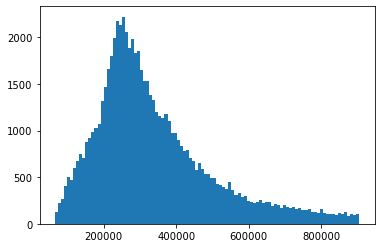

In [24]:
import matplotlib.pyplot as plt

plt.hist(train_values, bins=100)
plt.show()

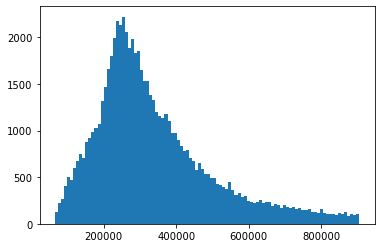

In [25]:
plt.hist(test_values, bins=100)
plt.show()